## Yi Lin (ID# 6935-8089-26)
## email: ylin4666@usc.edu
## DSCI552 HW1

In [157]:
#Import Data and Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/Ellina/Desktop/DS552/HW/HW1/used_car_dataset.csv')


In [158]:
#Understand the dataset, Look through the data shape and what featues in the dataset.
print(df.shape)
print(df.columns)


(9997, 14)
Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'F1', 'F2', 'F3',
       'F4'],
      dtype='object')


# 1. Data Cleaning

## 1.1 Drop Useless Column

### 1.1.1 Drop Paint_Color

In [159]:
#Drop Paint_Color
df = df.drop(columns=['paint_color'], axis=1)


In [160]:
#Notice that price, year, odometer, F1, F2, F3 are numerical variables
df.describe()
df.shape

(9997, 13)

In [161]:
#drop all prices that are equal to 0
#Without Price, we are not able to make the prediction
#So we need to drop rows with price as 0
#df = df[df.price != 0]
#df.shape

### 1.1.2 Drop Fuel


In [162]:
#Since all used car's fuel are gas
#df = df.drop(columns=['fuel'], axis=1)

## 1.2 Outlier

- Outlier may cause many difference in both values of Standard Deviation and Mean, which impact the model accuracy. So we need to remove those outlier. 

- To remove the outliers of price, I use IQR

### 1.2.1 Price

In [163]:
y = sorted(df['price'])

quantile1, quantile3 = np.percentile(y, [10,90])
print(quantile1, quantile3)

3001.6000000000004 32072.399999999998


In [164]:
df = df[(df.price < 32072.399999) & (df.price >= 3001.6)]
df.shape

(7997, 13)

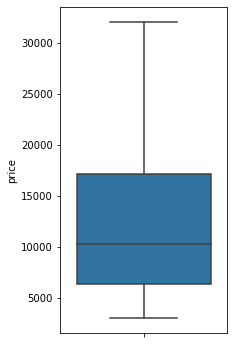

In [165]:
#Visualized the price via boxplot
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=df);

### 1.2.2 Year

- Looking the relevant years


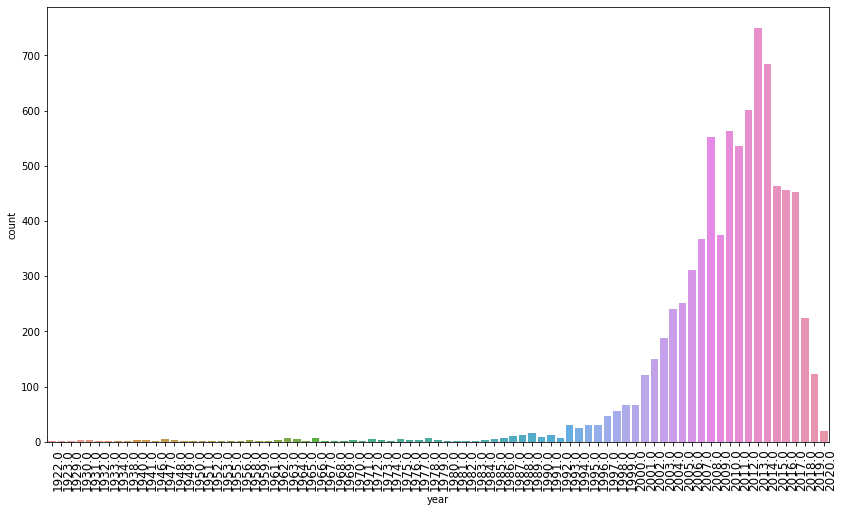

In [166]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x='year',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left",fontsize=12);



- Notice that used car was varied between years, I may delete the cars with year below the year of 1980.

In [167]:
df = df[df.year > 1980]
df.shape

(7879, 13)

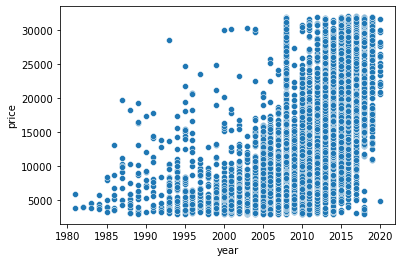

In [168]:
year_price = sns.scatterplot(x="year", y="price", data=df)


### 1.2.3 Odometer

In [169]:
df['odometer'].isna().sum()

468

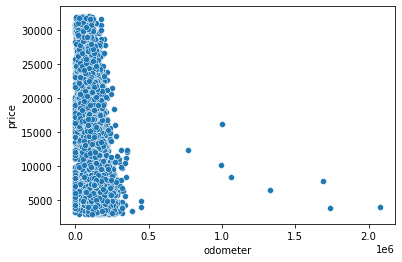

In [170]:
odometer_price = sns.scatterplot(x="odometer", y="price", data=df)

In [171]:
#Notice that there are several outliers of odometer
print(df['odometer'].max())
print(df['odometer'].min())


2074484.0
0.0


In [172]:
#Drop those outliers with max and min
df.drop(df[df["odometer"]==2074484.0].index,inplace=True)
df.drop(df[df["odometer"]==0.0].index,inplace=True)


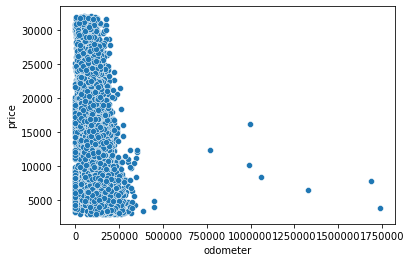

In [173]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [174]:
df["odometer"].isna().sum()

468

In [175]:
#Drop the NULL Values
df = df.dropna(subset=['odometer'])


In [176]:
df['odometer'].isna().sum()

0

In [177]:
df.shape

(7401, 13)

Accoding to OverDrive, 'most operators should be looking at an overhaul beginning at about 750,000 miles'

Link: https://www.overdriveonline.com/business/article/14874686/time-for-an-overhaul#:~:text=ENGINE%20MILEAGE.,Wittwer%2C%20owner%20of%20Performance%20Diesel.

In [178]:
#Drop all mileage above 750,000 miles 
df_new = df[~(df.odometer > 750000)]
df_new.shape

(7394, 13)

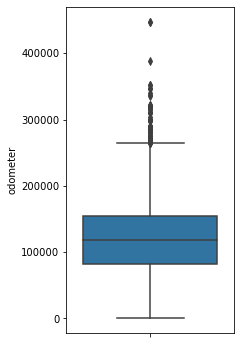

In [179]:
plt.figure(figsize=(3,6))
sns.boxplot(y='odometer', data=df_new);


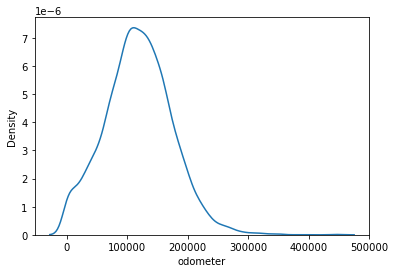

In [180]:
sns.kdeplot(data=df_new.odometer)

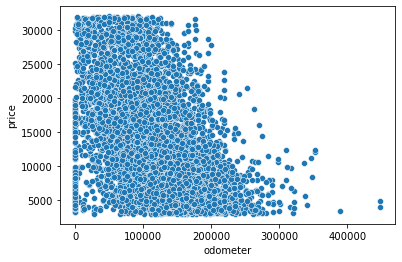

In [181]:
ax = sns.scatterplot(x="odometer", y="price", data=df_new)
ax.get_xaxis().get_major_formatter().set_scientific(False)

## 1.3 Missing Values

From the 1.2 Data Cleaning, I removed outliers from three numerical columns (price, year, odometer). 

Now, Need to chack whether there is any missing values in each feature.

In [182]:
#To see the number of Missing value
Missing_values = df_new.isnull().sum()
print(Missing_values)

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
F1              0
F2              0
F3              0
F4              0
dtype: int64


In [183]:
df_new[df_new['F4'].isnull()].index.tolist()
df_new[df_new['type'].isnull()].index.tolist()

[]

Notice that there is NO missing value, so we can explore the data analysis and could predict the price.  

# 2.Exploratory Data Analysis

To investigate the distribution of all features with respect to target feature(price) for a general understanding. 

In [184]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7394 entries, 0 to 9996
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7394 non-null   float64
 1   year          7394 non-null   float64
 2   manufacturer  7394 non-null   object 
 3   condition     7394 non-null   object 
 4   cylinders     7394 non-null   object 
 5   fuel          7394 non-null   object 
 6   odometer      7394 non-null   float64
 7   transmission  7394 non-null   object 
 8   type          7394 non-null   object 
 9   F1            7394 non-null   int64  
 10  F2            7394 non-null   float64
 11  F3            7394 non-null   float64
 12  F4            7394 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 808.7+ KB


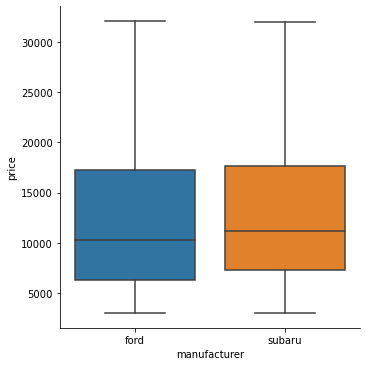

In [185]:
#Price V.S manufacturer
sns.catplot(x='manufacturer', y='price', kind='box',data=df_new)
                                                                                                                                               

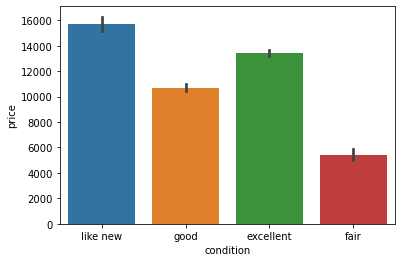

In [186]:
#Price V.S condition
sns.barplot(x='condition', y='price', data=df_new)

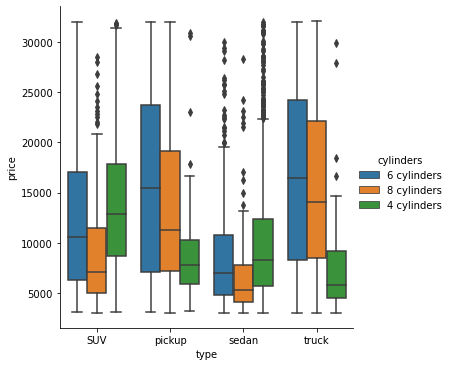

In [187]:
#Price V.S type & cylinders
sns.catplot(x='type', y='price', kind='box', hue='cylinders',data=df_new)


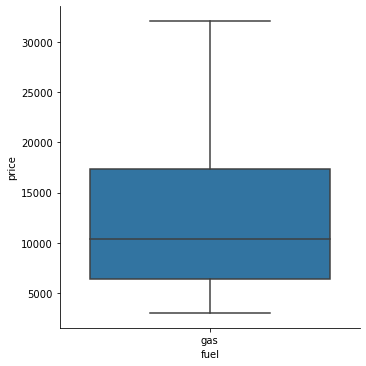

In [188]:
#Price V.S fuel
sns.catplot(x='fuel', y='price', kind='box', data=df_new)


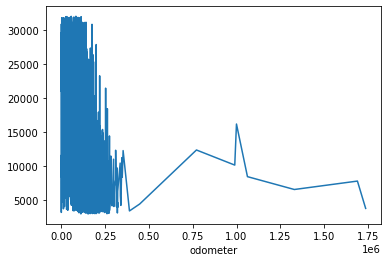

In [189]:
#Price V.S Odometer

#sns.scatterplot(x="odometer", y="price", data=df_new)

df.groupby(['odometer'])['price'].mean().plot()

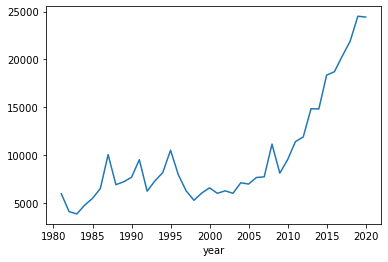

In [190]:
#Price and Year

#sns.scatterplot(x="year", y="price", data=df_new)

df.groupby(['year'])['price'].mean().plot()

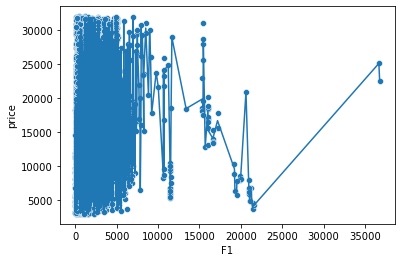

In [191]:
#Price V.S F1
sns.scatterplot(x='F1', y='price', data=df)


df.groupby(['F1'])['price'].mean().plot()


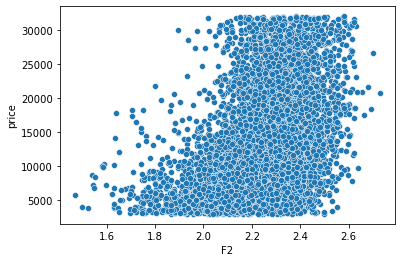

In [192]:
#Price V.S F2
sns.scatterplot(x="F2", y="price", data=df_new)



#plt.figure(figsize=(14,8))
#ax = sns.countplot(x='F2',data=df);
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12);



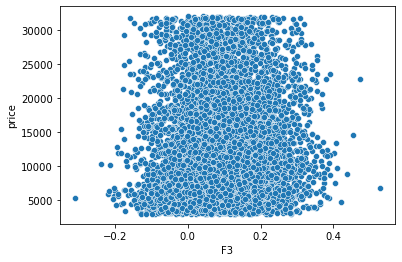

In [193]:
#Price V.S F3
sns.scatterplot(x="F3", y="price", data=df_new)



# 3. Data Preprocessing

- In order to prepare data for predictive modeling, we need to change caterogircal variables into numbers. 

- 1. Map oridnal catergorical variable (string >>> int)
- 2. Use OneHotEconder to convert categorical variables into one-hot vectors. 


In [194]:
#Look through each categorical value and counts
print(df_new.condition.value_counts())
print(df_new.cylinders.value_counts())
print(df_new.transmission.value_counts())
print(df_new.fuel.value_counts())
print(df_new.manufacturer.value_counts())
print(df_new.type.value_counts())
print(df_new.F4.value_counts())



excellent    3840
good         2612
like new      790
fair          152
Name: condition, dtype: int64
4 cylinders    2681
6 cylinders    2496
8 cylinders    2217
Name: cylinders, dtype: int64
automatic    7032
manual        362
Name: transmission, dtype: int64
gas    7394
Name: fuel, dtype: int64
ford      6529
subaru     865
Name: manufacturer, dtype: int64
SUV       2525
sedan     2149
truck     1641
pickup    1079
Name: type, dtype: int64
b    2601
a    2452
c    2341
Name: F4, dtype: int64


### 3.1 map categorical string to int

In [195]:
#map categorical string to int >>> ONLY apply in oridnal catergorical variable 
condition_ = {'excellent': 2, 'good': 1, 'like new': 3, 'fair': 0}
cylinders_ = {'4 cylinders': 4, '6 cylinders': 6, '8 cylinders':8}



In [196]:

condition = df_new['condition'].map(condition_).to_frame().reset_index(drop=True)
cylinders = df_new['cylinders'].map(cylinders_).to_frame().reset_index(drop=True)


### 3.2 One-Hot Vectorization 


In [197]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


transmission_encoder, fuel_encoder, manufacturer_encoder, type_encoder, F4_encoder  = OneHotEncoder(sparse=False),OneHotEncoder(sparse=False),OneHotEncoder(sparse=False),OneHotEncoder(sparse=False),OneHotEncoder(sparse=False)

#condition_hot = condition_encoder.fit_transform(df[['condition']])
#cylinders_hot = cylinders_encoder.fit_transform(df[['cylinders']])
transmission_hot = transmission_encoder.fit_transform(df_new[['transmission']])
fuel_hot = fuel_encoder.fit_transform(df_new[['fuel']])
manufacturer_hot = manufacturer_encoder.fit_transform(df_new[['manufacturer']])
type_hot = type_encoder.fit_transform(df_new[['type']])
F4_hot = F4_encoder.fit_transform(df_new[['F4']])



#Reference: Brownlee, J. (2019, August 14). How to one hot encode sequence data in python. Retrieved February 08, 2021, from https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/


In [198]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



def change_to_OneHotEncoder(name):
    
    data = df_new[name]
    values = array(data)
    print(values[0:15])

    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    print(integer_encoded[0:15])

    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)


    #print(onehot_encoded[0:5])
    onehot_encoded_df = pd.DataFrame(onehot_encoded)
    return onehot_encoded_df

type_df = change_to_OneHotEncoder('type')
type_df.columns=['SUV', 'pickup', 'sedan', 'truck']
#type_df.head(10)

F4_df = change_to_OneHotEncoder('F4')
F4_df.columns=['a','b','c']
#F4_df

manufacturer_df = change_to_OneHotEncoder('manufacturer')
manufacturer_df.columns = ['ford','subaru']


transmission_df = change_to_OneHotEncoder('transmission')
transmission_df.columns = ['automatic','manual']
transmission_df.head(15)

fuel_df = change_to_OneHotEncoder('fuel')
fuel_df.columns = ['fuel']

transmission_df

['SUV' 'SUV' 'pickup' 'sedan' 'truck' 'truck' 'sedan' 'truck' 'SUV'
 'sedan' 'pickup' 'SUV' 'pickup' 'SUV' 'truck']
[0 0 1 2 3 3 2 3 0 2 1 0 1 0 3]
['b' 'c' 'b' 'c' 'b' 'b' 'b' 'b' 'a' 'b' 'b' 'a' 'c' 'a' 'b']
[1 2 1 2 1 1 1 1 0 1 1 0 2 0 1]
['ford' 'ford' 'ford' 'ford' 'ford' 'ford' 'subaru' 'ford' 'ford' 'subaru'
 'subaru' 'subaru' 'ford' 'ford' 'ford']
[0 0 0 0 0 0 1 0 0 1 1 1 0 0 0]
['automatic' 'automatic' 'automatic' 'automatic' 'automatic' 'automatic'
 'automatic' 'automatic' 'automatic' 'automatic' 'automatic' 'automatic'
 'manual' 'automatic' 'automatic']
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
['gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas'
 'gas' 'gas' 'gas']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


,automatic,manual
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
7389,1.0,0.0
7390,1.0,0.0
7391,1.0,0.0
7392,1.0,0.0


### 3.3 Create new dataframe 'df_ready_to_train'

In [199]:
#Continuous Data
attributes = ['price', 'year', 'odometer','F1', 'F2', 'F3']
adf = df_new[attributes]

adf.shape

adf = adf.reset_index(drop=True)
adf

,price,year,odometer,F1,F2,F3
0,21978.0,2016.0,80813.0,138,2.472286,0.059031
1,4185.0,2008.0,201800.0,415,2.285245,0.046328
2,7693.0,2002.0,145000.0,535,1.861461,0.158554
3,15778.0,2016.0,50103.0,3435,2.331671,0.213665
4,10520.0,2005.0,207663.0,1212,2.061082,0.388724
...,...,...,...,...,...,...
7389,6269.0,2016.0,72000.0,266,2.345439,0.030099
7390,4020.0,2007.0,133000.0,46,2.212302,0.006381
7391,9960.0,2004.0,104392.0,1539,2.075114,0.245105
7392,20599.0,2017.0,31381.0,1686,2.214853,-0.007579


In [200]:
df_ready_to_train = pd.concat([adf, condition, cylinders, transmission_df,fuel_df, manufacturer_df, type_df, F4_df],axis=1)
df_ready_to_train

,price,year,odometer,F1,F2,F3,condition,cylinders,automatic,manual,fuel,ford,subaru,SUV,pickup,sedan,truck,a,b,c
0,21978.0,2016.0,80813.0,138,2.472286,0.059031,3,6,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4185.0,2008.0,201800.0,415,2.285245,0.046328,1,8,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7693.0,2002.0,145000.0,535,1.861461,0.158554,2,6,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,15778.0,2016.0,50103.0,3435,2.331671,0.213665,2,4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10520.0,2005.0,207663.0,1212,2.061082,0.388724,1,8,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,6269.0,2016.0,72000.0,266,2.345439,0.030099,3,4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7390,4020.0,2007.0,133000.0,46,2.212302,0.006381,2,4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7391,9960.0,2004.0,104392.0,1539,2.075114,0.245105,2,6,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7392,20599.0,2017.0,31381.0,1686,2.214853,-0.007579,2,4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [201]:
#Randomly pick one of feature to check if there is NULL index/value in the new data frame
df_ready_to_train[df_ready_to_train['year'].isnull()].index.tolist()

[]

# Understanding of special modification F1-F4

#### Assume alpha is 0.05

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [203]:
data = ['price','F1','F2','F3','a', 'b', 'c']
df_special_mod = df_ready_to_train[data]
print(df_special_mod)

        price    F1        F2        F3    a    b    c
0     21978.0   138  2.472286  0.059031  0.0  1.0  0.0
1      4185.0   415  2.285245  0.046328  0.0  0.0  1.0
2      7693.0   535  1.861461  0.158554  0.0  1.0  0.0
3     15778.0  3435  2.331671  0.213665  0.0  0.0  1.0
4     10520.0  1212  2.061082  0.388724  0.0  1.0  0.0
...       ...   ...       ...       ...  ...  ...  ...
7389   6269.0   266  2.345439  0.030099  1.0  0.0  0.0
7390   4020.0    46  2.212302  0.006381  0.0  1.0  0.0
7391   9960.0  1539  2.075114  0.245105  0.0  0.0  1.0
7392  20599.0  1686  2.214853 -0.007579  0.0  1.0  0.0
7393  12149.0   659  2.180665  0.165511  1.0  0.0  0.0

[7394 rows x 7 columns]


In [204]:
#model 1
X = df_special_mod[['F1','F2','F3','a', 'b', 'c']]
Y = df_special_mod['price']
X = sm.add_constant(X)
model1 = sm.OLS(Y, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     397.9
Date:                Wed, 10 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:53:01   Log-Likelihood:                -75586.
No. Observations:                7394   AIC:                         1.512e+05
Df Residuals:                    7388   BIC:                         1.512e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.377e+04    801.588    -29.660      0.000   -2.53e+04   -2.22e+04
F1             0.4988      0.037     13.553      0.000       0.427       0.571
F2          1.931e+04    477.135     40.462      0.000    1.84e+04    2.02e+04
F3          4082.7512    764.288      5.342      0.000    2584.530    5580.973
a          -7831.0692    289.462    -27.054      0.000   -8398.497   -7263.641
b          -7813.5192    284.782    -27.437      0.000   -8371.774   -7255.265
c          -8130.1766    292.229    -27.821      0.000   -8703.028   -7557.325
==============================================================================
Omnibus:                      627.984   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              798.337
Skew:                           0.799   Prob(JB):                    4.40e-174
Kurtosis:                       3.198   Cond. No.                     1.85e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [205]:
# model 2
X = df_special_mod['F1']
Y = df_special_mod['price']
X = sm.add_constant(X)
model2 = sm.OLS(Y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     270.4
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           1.03e-59
Time:                        13:53:01   Log-Likelihood:                -76335.
No. Observations:                7394   AIC:                         1.527e+05
Df Residuals:                    7392   BIC:                         1.527e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.161e+04    102.715    113.071      0.000    1.14e+04    1.18e+04
F1             0.6648      0.040     16.445      0.000       0.586       0.744
==============================================================================
Omnibus:                      656.606   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              846.683
Skew:                           0.828   Prob(JB):                    1.40e-184
Kurtosis:                       2.908   Cond. No.                     3.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [206]:
#model 3
X = df_special_mod['F2']
Y = df_special_mod['price']
X = sm.add_constant(X)
model3 = sm.OLS(Y, X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     1729.
Date:                Wed, 10 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:53:01   Log-Likelihood:                -75690.
No. Observations:                7394   AIC:                         1.514e+05
Df Residuals:                    7392   BIC:                         1.514e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.208e+04   1075.963    -29.812      0.000   -3.42e+04      -3e+04
F2          1.997e+04    480.204     41.582      0.000     1.9e+04    2.09e+04
==============================================================================
Omnibus:                      617.571   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              784.070
Skew:                           0.795   Prob(JB):                    5.51e-171
Kurtosis:                       3.120   Cond. No.                         36.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
#model 4
X = df_special_mod['F3']
Y = df_special_mod['price']
X = sm.add_constant(X)
model4 = sm.OLS(Y, X).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     12.76
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           0.000357
Time:                        13:53:01   Log-Likelihood:                -76461.
No. Observations:                7394   AIC:                         1.529e+05
Df Residuals:                    7392   BIC:                         1.529e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.224e+04    121.105    101.110      0.000     1.2e+04    1.25e+04
F3          3069.6582    859.457      3.572      0.000    1384.877    4754.440
==============================================================================
Omnibus:                      704.602   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              913.376
Skew:                           0.855   Prob(JB):                    4.60e-199
Kurtosis:                       2.791   Cond. No.                         9.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
#model 5
X = df_special_mod[['a']]
Y = df_special_mod['price']
X = sm.add_constant(X)
model5 = sm.OLS(Y, X).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9696
Date:                Wed, 10 Feb 2021   Prob (F-statistic):              0.325
Time:                        13:53:01   Log-Likelihood:                -76467.
No. Observations:                7394   AIC:                         1.529e+05
Df Residuals:                    7392   BIC:                         1.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.248e+04    106.719    116.987      0.000    1.23e+04    1.27e+04
a            182.4794    185.320      0.985      0.325    -180.800     545.758
==============================================================================
Omnibus:                      699.763   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              901.989
Skew:                           0.848   Prob(JB):                    1.37e-196
Kurtosis:                       2.772   Cond. No.                         2.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
#model 6
X = df_special_mod[['b']]
Y = df_special_mod['price']
X = sm.add_constant(X)
model6 = sm.OLS(Y, X).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2103
Date:                Wed, 10 Feb 2021   Prob (F-statistic):              0.647
Time:                        13:53:01   Log-Likelihood:                -76467.
No. Observations:                7394   AIC:                         1.529e+05
Df Residuals:                    7392   BIC:                         1.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.257e+04    108.371    116.034      0.000    1.24e+04    1.28e+04
b            -83.7953    182.718     -0.459      0.647    -441.974     274.384
==============================================================================
Omnibus:                      699.540   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              901.712
Skew:                           0.848   Prob(JB):                    1.57e-196
Kurtosis:                       2.773   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [210]:
#model 7
X = df_special_mod[['c']]
Y = df_special_mod['price']
X = sm.add_constant(X)
model7 = sm.OLS(Y, X).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2764
Date:                Wed, 10 Feb 2021   Prob (F-statistic):              0.599
Time:                        13:53:01   Log-Likelihood:                -76467.
No. Observations:                7394   AIC:                         1.529e+05
Df Residuals:                    7392   BIC:                         1.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.258e+04    105.545    119.157      0.000    1.24e+04    1.28e+04
c            -98.6218    187.576     -0.526      0.599    -466.325     269.081
==============================================================================
Omnibus:                      700.094   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              902.587
Skew:                           0.848   Prob(JB):                    1.01e-196
Kurtosis:                       2.772   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



- By compare model 1, and model 2,3,4,5,6,7. Notice P-value of 'a', 'b', 'c' are greater than 0.05, which implies statistically signifianct. P-value of rest attributes (0.0) is smaller than 0.05, which implies statistaically insignificant. 

In [211]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set 
Indepent_var = df_ready_to_train[['F1', 'F2', 'F3', 'a', 'b', 'c']]

# VIF dataframe 
vif_data = pd.DataFrame()
vif_data['features'] = Indepent_var.columns

# calculating VIF for each feature 
vif_data['VIF'] = [variance_inflation_factor(Indepent_var.values, i)
                   for i in range(len(Indepent_var.columns))]

print(vif_data)

                    

  features        VIF
0       F1   1.014105
1       F2   1.015019
2       F3   1.001481
3        a  63.864514
4        b  67.174430
5        c  61.266830


Based on Rule of Thumb (according to lecture note): 

- VIF > 5 demonstrates that it is a high multicollinearity which means highly correlated in F4 (a, b, c). Drop either one should do the trick. 

- VIF < 5 demonstrates that it is a low multicollinearity which means lower correlated in F1, F2, F3. 

# Understanding of feature

#### Assume alpha is 0.05

In [212]:
#Plot correlation matrix
corr = df_ready_to_train.corr()
corr.style.background_gradient(cmap='coolwarm')

/Users/Ellina/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/Ellina/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,price,year,odometer,F1,F2,F3,condition,cylinders,automatic,manual,fuel,ford,subaru,SUV,pickup,sedan,truck,a,b,c
price,1.000000,0.557916,-0.468341,0.187869,0.435396,0.041506,0.252202,0.120408,0.037968,-0.037968,nan,-0.017916,0.017916,-0.013826,0.096617,-0.262204,0.220198,0.011452,-0.005334,-0.006115
year,0.557916,1.000000,-0.430857,0.154653,0.792632,-0.045446,0.307002,-0.395373,0.136558,-0.136558,nan,-0.111591,0.111591,0.120431,-0.160688,0.156638,-0.172070,0.005710,-0.042191,0.037535
odometer,-0.468341,-0.430857,1.000000,-0.134033,-0.335602,0.047244,-0.277918,0.316083,0.025850,-0.025850,nan,0.107450,-0.107450,-0.036309,0.095450,-0.160691,0.135926,-0.028203,0.029978,-0.002231
F1,0.187869,0.154653,-0.134033,1.000000,0.115272,-0.024796,0.102744,-0.046218,0.010766,-0.010766,nan,0.014912,-0.014912,0.015787,0.006467,0.032766,-0.059313,0.003838,-0.014825,0.011335
F2,0.435396,0.792632,-0.335602,0.115272,1.000000,-0.023613,0.227892,-0.329442,0.098290,-0.098290,nan,-0.105719,0.105719,0.103910,-0.140057,0.129167,-0.140728,0.008770,-0.033156,0.025161
F3,0.041506,-0.045446,0.047244,-0.024796,-0.023613,1.000000,-0.019913,-0.012327,-0.015899,0.015899,nan,-0.001756,0.001756,0.000823,-0.035271,0.025387,0.001286,-0.019799,0.005365,0.014531
condition,0.252202,0.307002,-0.277918,0.102744,0.227892,-0.019913,1.000000,-0.168001,0.038748,-0.038748,nan,-0.056923,0.056923,0.081194,-0.065407,0.068054,-0.111448,-0.007193,-0.018854,0.026635
cylinders,0.120408,-0.395373,0.316083,-0.046218,-0.329442,-0.012327,-0.168001,1.000000,0.144654,-0.144654,nan,0.392918,-0.392918,-0.180842,0.319471,-0.491175,0.471653,-0.007480,0.030093,-0.023323
automatic,0.037968,0.136558,0.025850,0.010766,0.098290,-0.015899,0.038748,0.144654,1.000000,-1.000000,nan,0.252831,-0.252831,0.089374,0.005018,-0.128081,0.033697,0.006718,-0.004802,-0.001870
manual,-0.037968,-0.136558,-0.025850,-0.010766,-0.098290,0.015899,-0.038748,-0.144654,-1.000000,1.000000,nan,-0.252831,0.252831,-0.089374,-0.005018,0.128081,-0.033697,-0.006718,0.004802,0.001870


- From here, we can see that year, condition, odometer, F2, sedan, truck have relatively high positive and negative relationship with price. 

- We can visualized to see the strong/weak relationship between features and target variable. 

- Interesting found that F2 and Year have highly correlation.



In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [214]:
target = df_ready_to_train[['price']]
features = df_ready_to_train.drop(columns =['price'])

X_1 = sm.add_constant(features)
X_1

model = sm.OLS(target,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1088.
Date:                Wed, 10 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:53:02   Log-Likelihood:                -72328.
No. Observations:                7394   AIC:                         1.447e+05
Df Residuals:                    7379   BIC:                         1.448e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year         781.3361     15.918     49.085      0.000     750.132     812.540
odometer      -0.0461      0.001    -44.776      0.000      -0.048      -0.044
F1             0.2894      0.024     12.073      0.000       0.242       0.336
F2           165.7015    501.016      0.331      0.741    -816.432    1147.835
F3          7383.3967    493.628     14.957      0.000    6415.745    8351.048
condition    714.4873     78.755      9.072      0.000     560.105     868.869
cylinders   1215.6137     46.668     26.048      0.000    1124.132    1307.096
automatic  -3.033e+05   6063.342    -50.026      0.000   -3.15e+05   -2.91e+05
manual     -3.005e+05   6027.423    -49.851      0.000   -3.12e+05   -2.89e+05
fuel       -6.038e+05   1.21e+04    -49.949      0.000   -6.27e+05    -5.8e+05
ford        -3.03e+05   6046.032    -50.117      0.000   -3.15e+05   -2.91e+05
subaru     -3.008e+05   6043.509    -49.770      0.000   -3.13e+05   -2.89e+05
SUV        -1.522e+05   3024.053    -50.328      0.000   -1.58e+05   -1.46e+05
pickup     -1.487e+05   3023.199    -49.175      0.000   -1.55e+05   -1.43e+05
sedan      -1.553e+05   3021.414    -51.385      0.000   -1.61e+05   -1.49e+05
truck      -1.477e+05   3026.612    -48.794      0.000   -1.54e+05   -1.42e+05
a          -2.012e+05   4029.258    -49.944      0.000   -2.09e+05   -1.93e+05
b           -2.01e+05   4028.912    -49.893      0.000   -2.09e+05   -1.93e+05
c          -2.015e+05   4031.985    -49.987      0.000   -2.09e+05   -1.94e+05
==============================================================================
Omnibus:                      603.701   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1457.166
Skew:                           0.494   Prob(JB):                         0.00
Kurtosis:                       4.937   Cond. No.                     4.21e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""



### Feature Selection - Backward Elimination


In [215]:
#Backward Elimination
#Reference: https://www.kaggle.com/anerisavani/eda-and-price-prediction-of-used-vehicles
cols = list(features.columns)
p_max = 1
i = 0
while (len(cols)>0):
    p= []
    X_1 = features[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(target,X_1).fit()
    p = pd.Series(model.pvalues.values[0:],index = cols)      
    p_max = max(p)
    feature_with_p_max = p.idxmax()
    if(p_max>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['year', 'odometer', 'F1', 'F3', 'condition', 'cylinders', 'automatic', 'manual', 'fuel', 'ford', 'subaru', 'SUV', 'pickup', 'sedan', 'truck', 'a', 'b', 'c']


- Assume alpha is 0.05. 

- Notice that only P-value F2 (0.741) is greater than 0.05, which implies F2 is statistically insignificant. So we drop F2 variable and apply the rest of dataset into model. 

## Split Data into Train and Test 

In [216]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



from sklearn import svm
from sklearn.model_selection import cross_val_score

In [217]:
y = df_ready_to_train[['price']]
#X = df_ready_to_train.drop(columns =['price', 'F2', 'F3', 'a', 'b', 'c'])
#X = df_ready_to_train[['F1', 'F2', 'odometer', 'condition', 'sedan', 'truck']]
X = df_ready_to_train.drop(columns =['price', 'F2'])

#Split Training & Testing Set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)


#Split Training Set again into Training & validation Set
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


print(Xtrain.shape, ytrain.shape)
print(Xval.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)


(4436, 18) (4436, 1)
(1479, 18) (4436, 1)
(1479, 18) (1479, 1)


In [218]:
LR = linear_model.LinearRegression()
rr  = Ridge(alpha=1)
Lasso = Lasso(normalize=True)
EN = ElasticNet(random_state=0)


In [219]:
LR.fit(Xtrain,ytrain)
rr.fit(Xtrain, ytrain)
Lasso.fit(Xtrain, ytrain)
EN.fit(Xtrain, ytrain)


ElasticNet(random_state=0)

In [220]:
ypred0_LR_val = LR.predict(Xval)
ypred1_rr_val = rr.predict(Xval)
ypred2_Lasso_val = Lasso.predict(Xval)
ypred3_EN_val = EN.predict(Xval)

ypred0_LR_test = LR.predict(Xtest)
ypred1_rr_test = rr.predict(Xtest)
ypred2_Lasso_test = Lasso.predict(Xtest)
ypred3_EN_test = EN.predict(Xtest)

In [221]:
rmse0_LR_val = mean_squared_error(yval, ypred0_LR_val)**(0.5)
rmse1_rr_val = mean_squared_error(yval, ypred1_rr_val)**(0.5)
rmse2_Lasso_val = mean_squared_error(yval, ypred2_Lasso_val)**(0.5)
rmse3_EN_val = mean_squared_error(yval, ypred3_EN_val)**(0.5)

print('Validation Set: ================')
print('RMSE for Linear Regression:', rmse0_LR_val)
print('RMSE for Ridge:', rmse1_rr_val)
print('RMSE for Lasso:', rmse2_Lasso_val)
print('RMSE for Elastic Net:', rmse3_EN_val)

print('Validation >>> The Smallest RMSE is:', min(rmse0_LR_val, rmse1_rr_val, rmse2_Lasso_val, rmse3_EN_val))


rmse0_LR_test = mean_squared_error(ytest, ypred0_LR_test)**(0.5)
rmse1_rr_test = mean_squared_error(ytest, ypred1_rr_test)**(0.5)
rmse2_Lasso_test = mean_squared_error(ytest, ypred2_Lasso_test)**(0.5)
rmse3_EN_test = mean_squared_error(ytest, ypred3_EN_test)**(0.5)

#rmse0_LR = mean_squared_error(ytest, ypred0_LR)
#rmse1_rr = mean_squared_error(ytest, ypred1_rr)
#rmse2_Lasso = mean_squared_error(ytest, ypred2_Lasso)
#rmse3_EN = mean_squared_error(ytest, ypred3_EN)

print('Testing Set: ================')
print('RMSE for Linear Regression:', rmse0_LR_test)
print('RMSE for Ridge:', rmse1_rr_test)
print('RMSE for Lasso:', rmse2_Lasso_test)
print('RMSE for Elastic Net:', rmse3_EN_test)


print('Testing >>> The Smallest RMSE is:', min(rmse0_LR_test, rmse1_rr_test, rmse2_Lasso_test, rmse3_EN_test))





Validation Set: ================
RMSE for Linear Regression: 4384.251464407651
RMSE for Ridge: 4383.833984700589
RMSE for Lasso: 4384.933511563346
RMSE for Elastic Net: 4818.178944073258
Validation >>> The Smallest RMSE is: 4383.833984700589
Testing Set: ================
RMSE for Linear Regression: 4286.163138541975
RMSE for Ridge: 4286.021188345149
RMSE for Lasso: 4309.564301292867
RMSE for Elastic Net: 4815.007498939578
Testing >>> The Smallest RMSE is: 4286.021188345149


- The Smallest RMSE is Ridge Regression Model, which is around 4286. 

In [222]:
r2_LR_val = r2_score(yval,ypred0_LR_val)
r2_rr_val = r2_score(yval,ypred1_rr_val)
r2_Lasso_val = r2_score(yval,ypred2_Lasso_val)
r2_EN_val = r2_score(yval,ypred3_EN_val)

print('Validation Set: ================')
print('R^2 for Linear Regression:', r2_LR_val)
print('R^2 for Ridge:', r2_rr_val)
print('R^2 for Lasso:', r2_Lasso_val)
print('R^2 for Elastic Net:', r2_EN_val)


r2_LR_test = r2_score(ytest,ypred0_LR_test)
r2_rr_test = r2_score(ytest,ypred1_rr_test)
r2_Lasso_test = r2_score(ytest,ypred2_Lasso_test)
r2_EN_test = r2_score(ytest,ypred3_EN_test)

print('Testing Set: ================')
print('R^2 for Linear Regression:', r2_LR_test)
print('R^2 for Ridge:', r2_rr_test)
print('R^2 for Lasso:', r2_Lasso_test)
print('R^2 for Elastic Net:', r2_EN_test)


Validation Set: ================
R^2 for Linear Regression: 0.6619243977700853
R^2 for Ridge: 0.6619887795623646
R^2 for Lasso: 0.6618192024178409
R^2 for Elastic Net: 0.5916911721736602
Testing Set: ================
R^2 for Linear Regression: 0.6910604036421433
R^2 for Ridge: 0.6910808663771855
R^2 for Lasso: 0.6876777599517484
R^2 for Elastic Net: 0.6101207549235761


### Use Ridge Regression Model with testing set

In [223]:
rr.fit(Xtest,ytest)
rr.fit(Xtest,ytest)
ypred1_rr_test = rr.predict(Xtest)

rmse1_rr_test = mean_squared_error(ytest, ypred1_rr_test) ** (0.5)
print('RMSE for Linear Regression:', rmse1_rr_test)

r2_rr_test = r2_score(ytest,ypred1_rr_test)
print('R^2 for Linear Regression:', r2_rr_test)

RMSE for Linear Regression: 4222.7433218653905
R^2 for Linear Regression: 0.7001351587201355


### Use Linear Regression Model with testing set

In [224]:
#LR.fit(Xtest,ytest)
#LR.fit(Xtest,ytest)
#ypred0_LR_test = LR.predict(Xtest)

#rmse0_LR_test = mean_squared_error(ytest, ypred0_LR_test) ** (0.5)
#print('RMSE for Linear Regression:', rmse0_LR_test)

#r2_LR_test = r2_score(ytest,ypred0_LR_test)
#print('R^2 for Linear Regression:', r2_LR_test)

In [225]:
#acc_LR = round(LR.score(Xtrain, ytrain) * 100, 3)
#acc_rr = round(rr.score(Xtrain, ytrain) * 100, 3)
#acc_Lasso = round(Lasso.score(Xtrain, ytrain) * 100, 3)
#acc_EN = round(EN.score(Xtrain, ytrain) * 100, 3)


#print('Accuracy for Linear Regression:', acc_LR)
#print('Accuracy for Ridge:', acc_rr)
#print('Accuracy for Lasso:', acc_Lasso)
#print('Accuracy for EN:', acc_EN)


